In [1]:
import numpy as np
from scipy import odr
import matplotlib.pyplot as plt

In [2]:
def linear(B, x):
    return B[0]*x + B[1]

[]

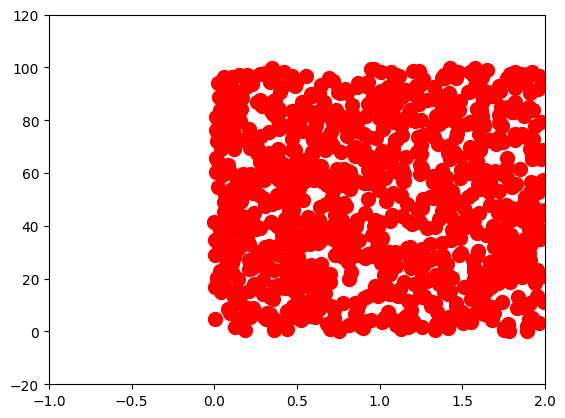

In [3]:
B = [10000,0]
n_points = 1000

x_meas =  np.random.rand(n_points)*2
y_meas = np.random.rand(n_points) * 100

plt.figure()
plt.scatter(x_meas,y_meas, c='red',s=100)
plt.xlim(-1, 2)
plt.ylim(-20, 120)
plt.plot()

[]

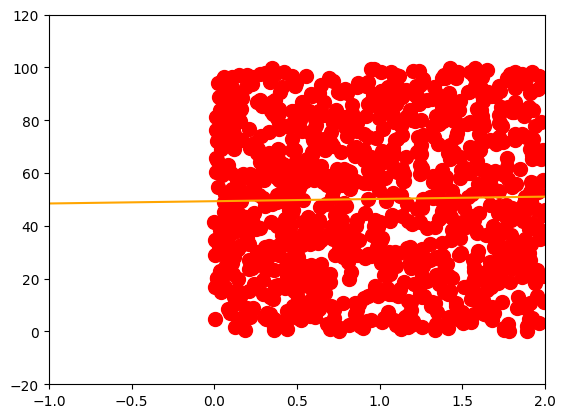

In [4]:
B_pred = np.polyfit(x_meas,y_meas, 1)
x_pred_line= np.linspace(-5,5)
y_pred_line = linear(B_pred, x_pred_line)
plt.figure()
plt.scatter(x_meas,y_meas, c='red',s=100)
plt.plot(x_pred_line, y_pred_line, c= 'orange')
plt.xlim(-1, 2)
plt.ylim(-20, 120)
plt.plot()

0.2901167869567871


[]

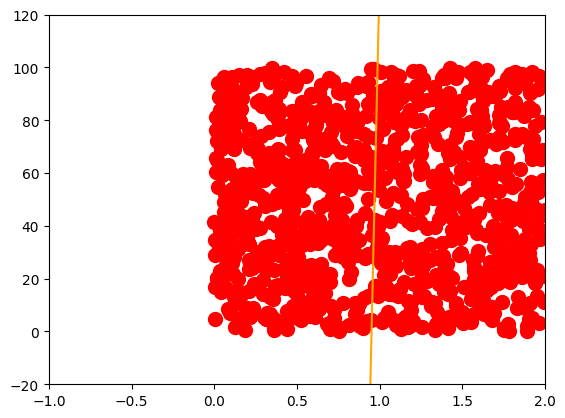

In [5]:
import time

start = time.time()
odr_model = odr.Model(linear)
data = odr.Data(x_meas, y_meas)
ordinal_distance_reg = odr.ODR(data, odr_model,
                               beta0=[0.2, 1.],
                               maxit=600)
out = ordinal_distance_reg.run()
line_coeffs = out.beta
end = time.time()
print(end - start)

x_pred_line= np.linspace(-5,5)
y_pred_line = linear(line_coeffs, x_pred_line)
plt.figure()
plt.scatter(x_meas,y_meas, c='red',s=100)
plt.plot(x_pred_line, y_pred_line, c= 'orange')
plt.xlim(-1, 2)
plt.ylim(-20, 120)

plt.plot()



In [6]:
out.pprint()

Beta: [ 2750.79728165 -2618.40765692]
Beta Std Error: [4877.28350934 4731.81091911]
Beta Covariance: [[ 68426357.46855776 -66381534.72350655]
 [-66381534.72350655  64405385.43594977]]
Residual Variance: 0.34764227281027
Inverse Condition #: 0.005366048671010252
Reason(s) for Halting:
  Sum of squares convergence


In [7]:
out.res_var

0.34764227281027

### Cut off line

In [8]:
def cut_off(x, y, y_min, y_max, line_coeffs, i):
    if y[i] > y_max:
        y[i] = y_max
        x[i] = 1/line_coeffs[0]*(y_max-line_coeffs[1])
    if y[i] < y_min:
        y[i] = y_min
        x[i] = 1/line_coeffs[0]*(y_min-line_coeffs[1])

[0.1 2. ]
[1.1 3. ]


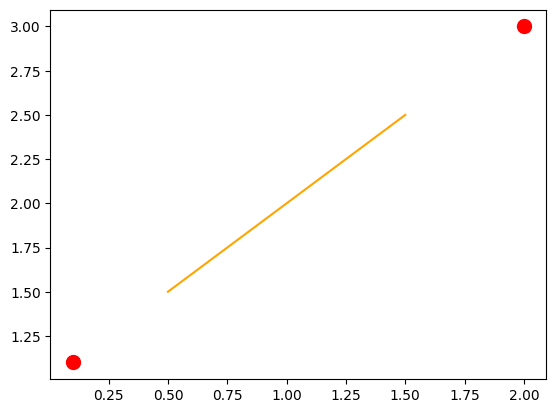

In [9]:
line_coeffs = np.array([1,1])
x_start, x_end = 0.1, 2
y_min, y_max = 1.5, 2.5
x = np.array([x_start, x_end])
line = np.poly1d(line_coeffs)
y = line(x)

plt.scatter(x, y, marker = 'o', c='red', s=100)

print(x)
print(y)

cut_off(x, y, y_min, y_max, line_coeffs, 0)
cut_off(x, y, y_min, y_max, line_coeffs, 1)

plt.plot(x, line(x), color='orange')
plt.show()

